[[-1.45640120e-02  4.67400505e+00]
 [ 3.56622447e-04 -1.60771096e-01]
 [ 1.42074059e-02 -4.51323395e+00]] [-192.74638583   14.01455135  178.73183451]


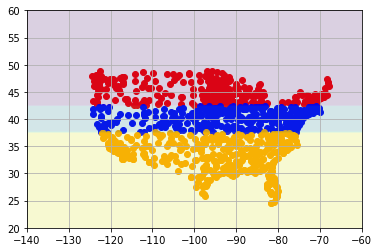

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import pandas as pd

data = pd.read_csv("dataCollection.csv")

number = data['USAF'].values
latitude = data['Latitude'].values
longitude = data['Longitude'].values
etr = data['Avg hourly ETR in 2005 (Wh/m^2)'].values
length = number.size
classes = np.empty(length,dtype=int)

for i in range(length):
    if etr[i] < 320:
        classes[i]=0
    elif 320 < etr[i] < 340:
        classes[i]=1
    else:
        classes[i]=2

# get labels and features, use sepal this time
y = classes
x1 = longitude
x2 = latitude
x=np.array([x1,x2])
x=x.T
# scatter plot
colors=('r','b','orange')
for target in range(3):
  plt.scatter(x1[y==target],x2[y==target],c=colors[target])
plt.grid(1)

# train model1
log_regress = linear_model.LogisticRegression(max_iter=1000)
log_regress.fit(x,y)
xx1, xx2 = np.meshgrid(np.linspace(-140,-60,100),np.linspace(20, 60,100))
z=log_regress.predict(np.c_[xx1.ravel(), xx2.ravel()])
z=z.reshape(xx1.shape)

print(log_regress.coef_,log_regress.intercept_)
plt.contourf(xx1,xx2,z,alpha=.2)
